In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline  
inv = np.linalg.inv
plt.style.use('ggplot')

In [2]:
# import data
with open('online_news_popularity.csv', 'r') as f:
    reader = csv.reader(f)
    a = list(reader)
    labels = a[0]
    data = np.array(a[1:])
data.shape

(39644, 61)

In [3]:
# convert the data into a convenient array
data[:,0] = 1.0
arrToFloat = np.vectorize(float)
data = arrToFloat(data)
shares = np.log(data[:,-1])

In [4]:
# split data into training and test data
dataRatio = .75
trainingrows = int(data.shape[0]*3/4)
trdata = data[0:trainingrows, :]
trshares = shares[0:trainingrows]
tstdata = data[trainingrows:, :]
tstshares = shares[trainingrows:]

In [5]:
# get closed form solution

ident = np.identity(trdata.shape[1]) # identity matrix
ident[0,0] = 0 # avoid normalizing the intercept
RMSE = [] # Root mean squared error
weightnorms = [] # the L2 norm of the weights

# normconsts is a linspace more tighthly spaced at smaller constants
normconsts = np.append(np.linspace(.01, 100, 500), np.linspace(100, 1000, 500))

# loop finding weights and accuracy at different values of normalization constants 
for normconst in normconsts:
    toinvert = (normconst * ident + np.dot(np.transpose(trdata), trdata))
    weights = np.dot(inv(toinvert), np.dot(np.transpose(trdata), trshares))
    weightnorms += [(np.dot(weights, weights))**.5] # calc. L2 norm of weights
    error = np.dot(tstdata,weights) - tstshares
    RMSE += [1/tstdata.shape[0] * np.dot(error,error)**.5] # calc. RMSE

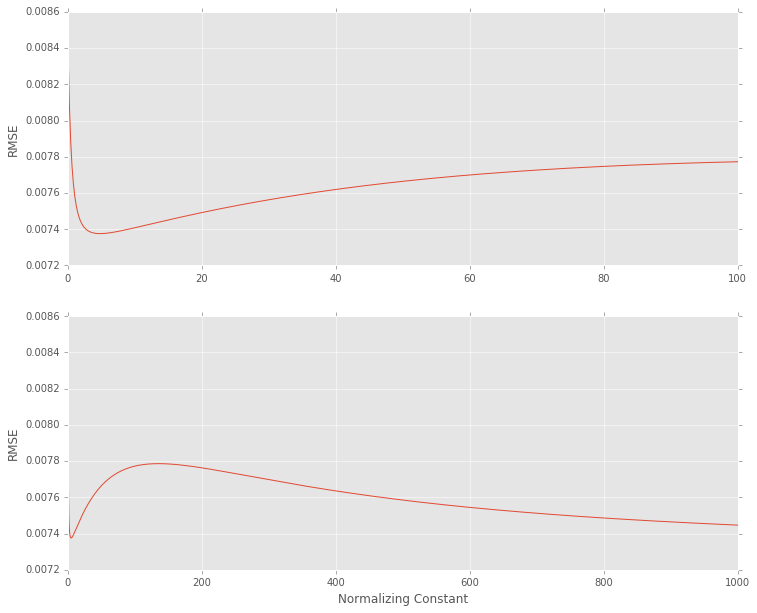

In [6]:
# plot RMSE vs. normalization constants

fig = plt.figure(figsize = (12,10))
smallrange = fig.add_subplot(211)
bigrange = fig.add_subplot(212)
smallrange.plot(normconsts[0:500], RMSE[0:500])
bigrange.plot(normconsts, RMSE)
bigrange.set_xlabel('Normalizing Constant')
for ax in [smallrange, bigrange]:
    ax.set_ylabel('RMSE')

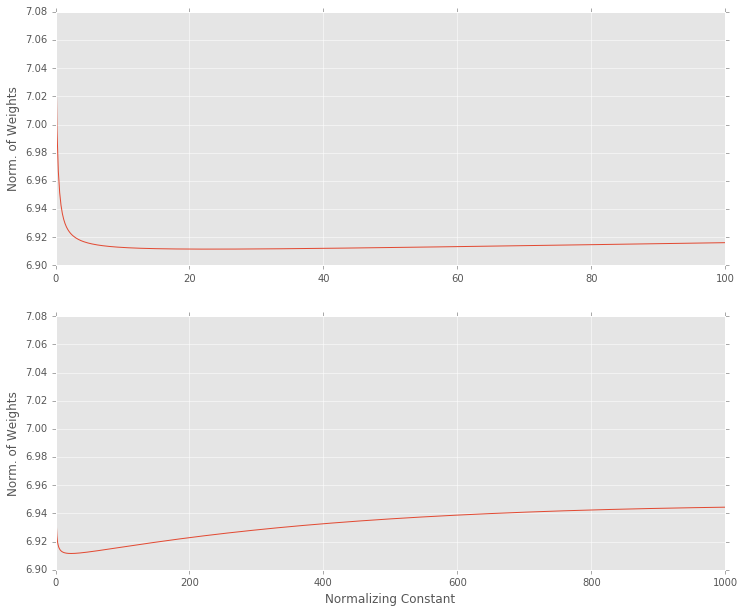

In [7]:
# plot L2 norm of weights vs. normalization constants

fig = plt.figure(figsize = (12,10))
smallrange = fig.add_subplot(211)
bigrange = fig.add_subplot(212)
smallrange.plot(normconsts[0:500], weightnorms[0:500])
bigrange.plot(normconsts, weightnorms)
bigrange.set_xlabel('Normalizing Constant')
for ax in [smallrange, bigrange]:
    ax.set_ylabel('Norm. of Weights')

In [10]:
print(weights.shape, tstdata.shape)

(61,) (9911, 61)
